<a href="https://colab.research.google.com/github/gammapasta/machineLearning/blob/main/3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

튿성이 1개 -> 2차원

다중히귀 -> 2개특성 -> 평면  3차원이됨

특성이 3개인경우 4차언 공간이 필요


## 특성공학  
기존의 특성을 사용하여 새로운 특성을 뽕아내는 작업
- 특성을 제곱하 특성추가
- 각 특성을 곱해서 새로운 특성 만
##판다스
- csv를 다꾸기


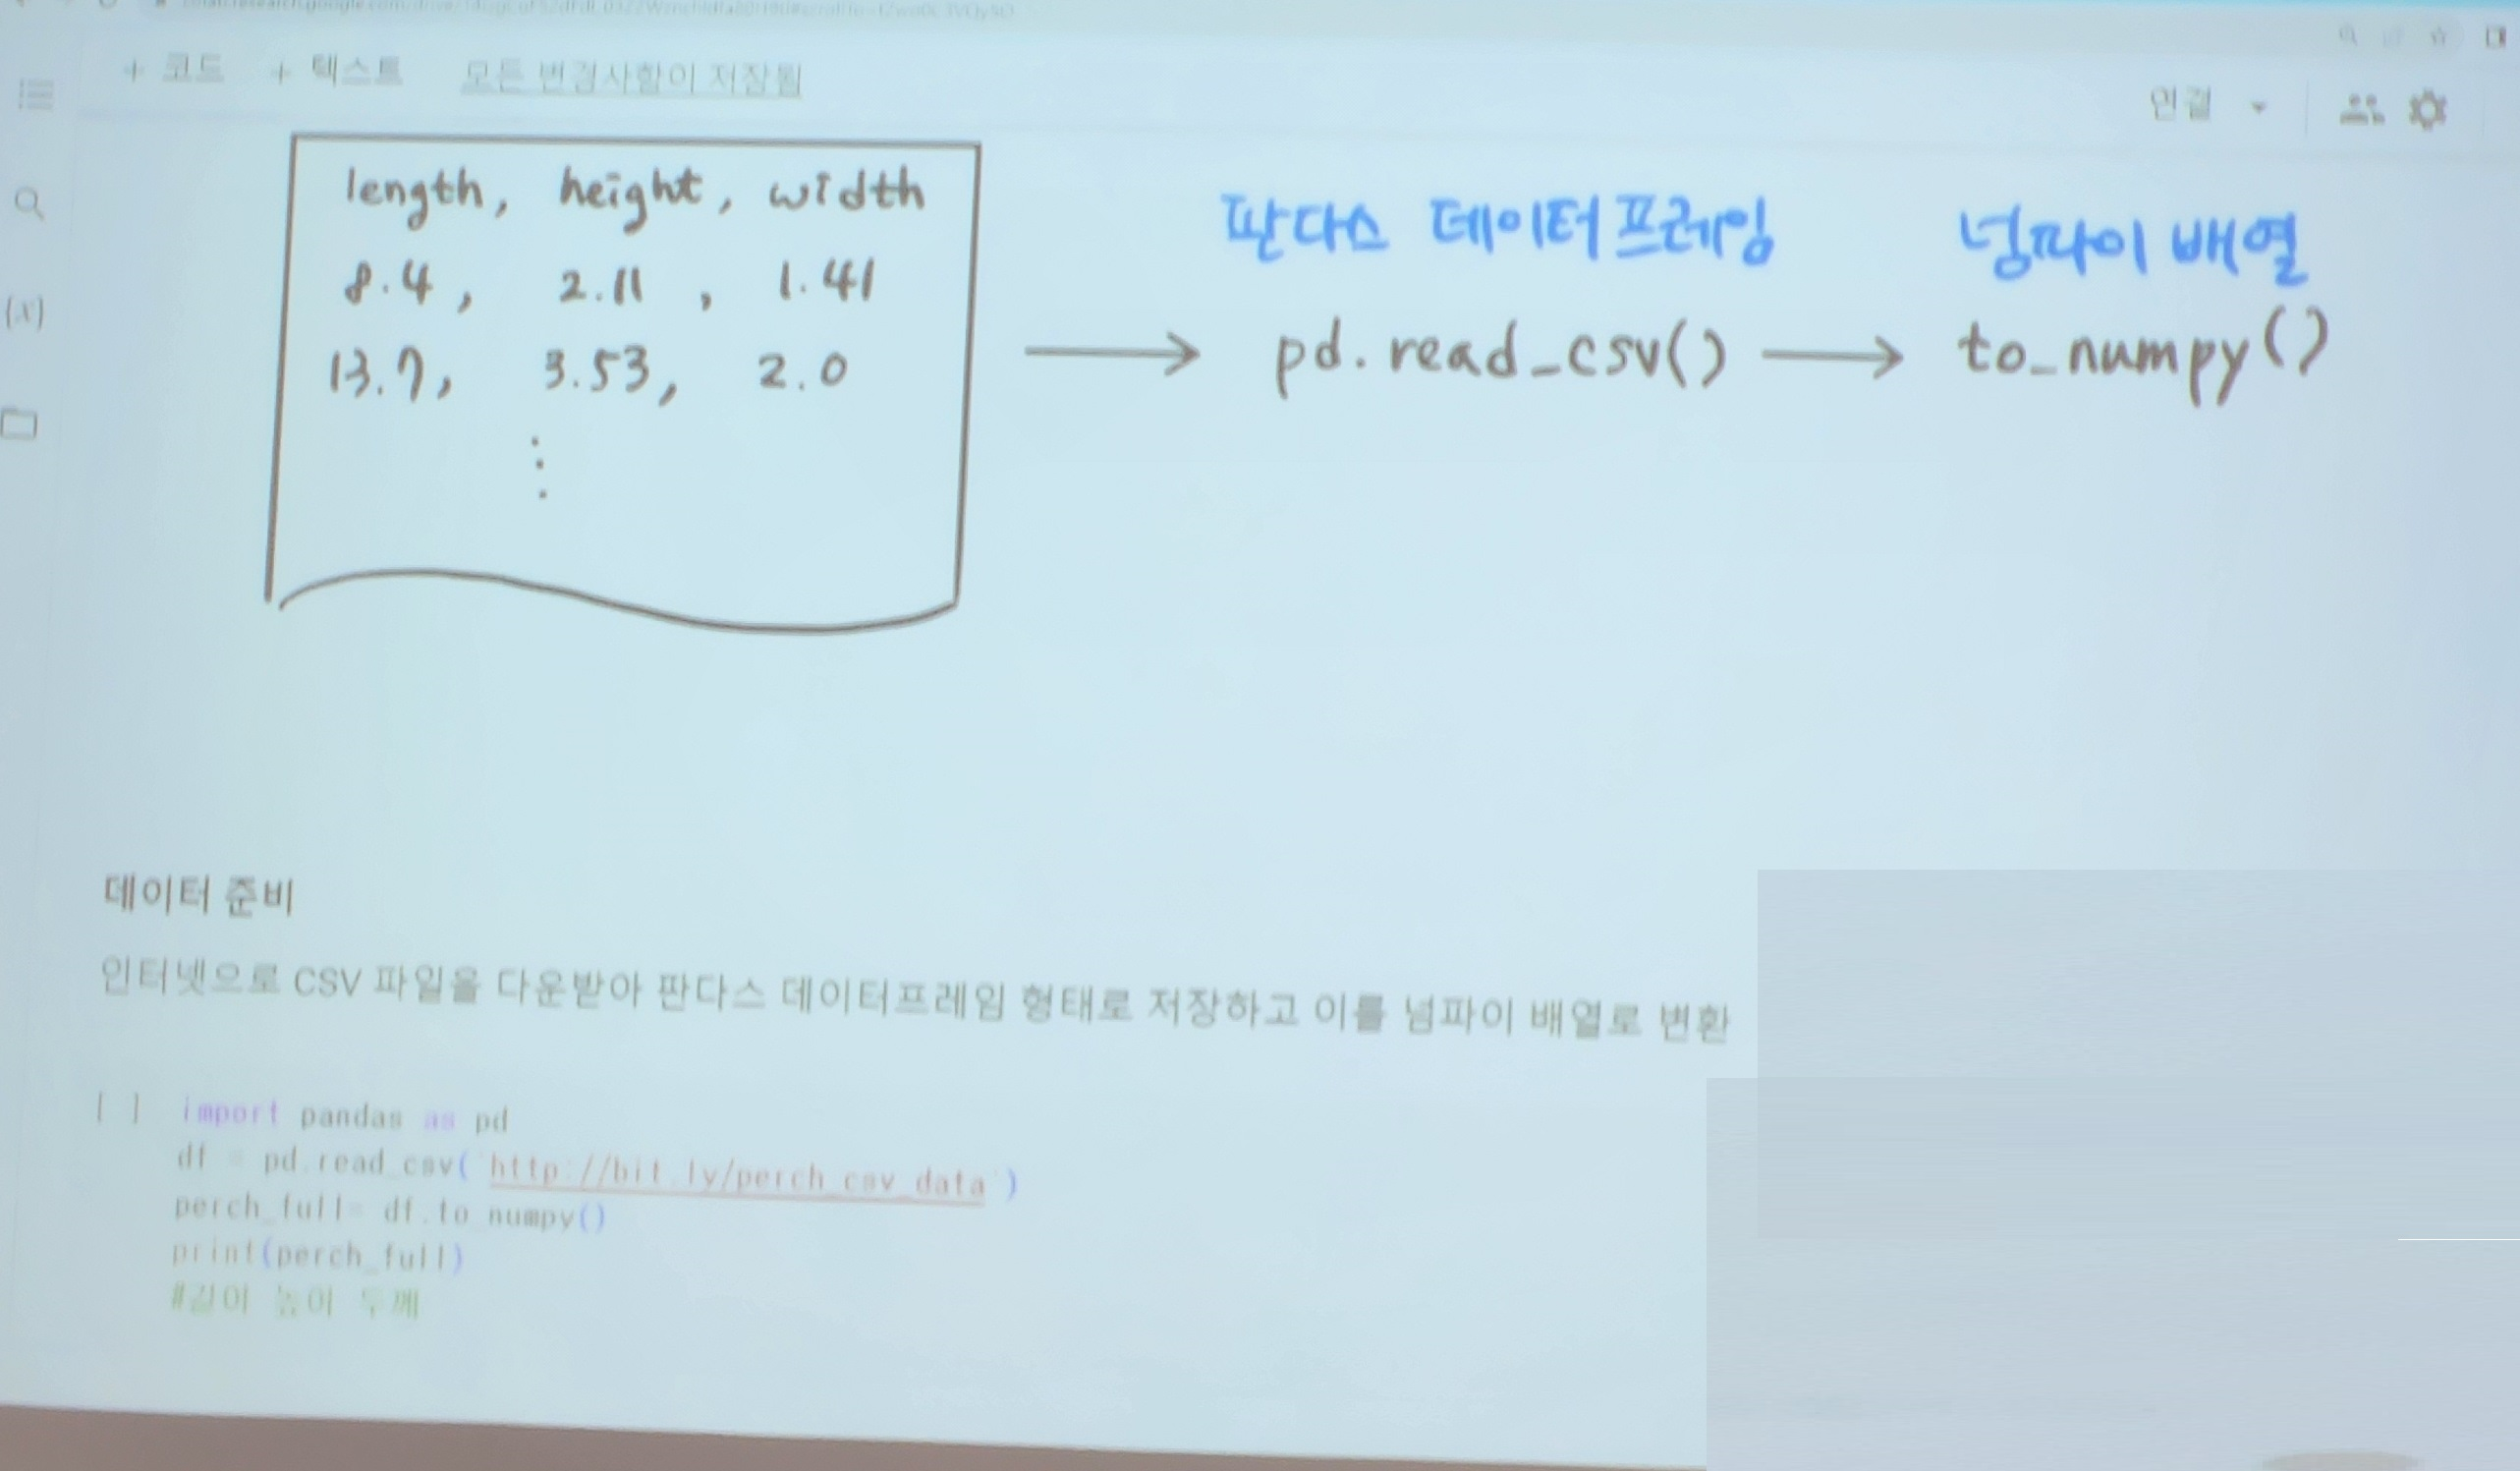

In [1]:
#https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/3-3.ipynb#scrollTo=8qmTS1RzKRKT
import pandas as pd

df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

target 데이터
http://

In [4]:
import numpy as np

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)


#새로운 특성추가
##사이킷런의 변환기



In [6]:
from sklearn.preprocessing import PolynomialFeatures

#예제
poly = PolynomialFeatures()

poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

#특성이 2개에서 6개로
#1 절편 2,3 입력값 4입력값 제고 6 입력값 곱 제곱

[[1. 2. 3. 4. 6. 9.]]


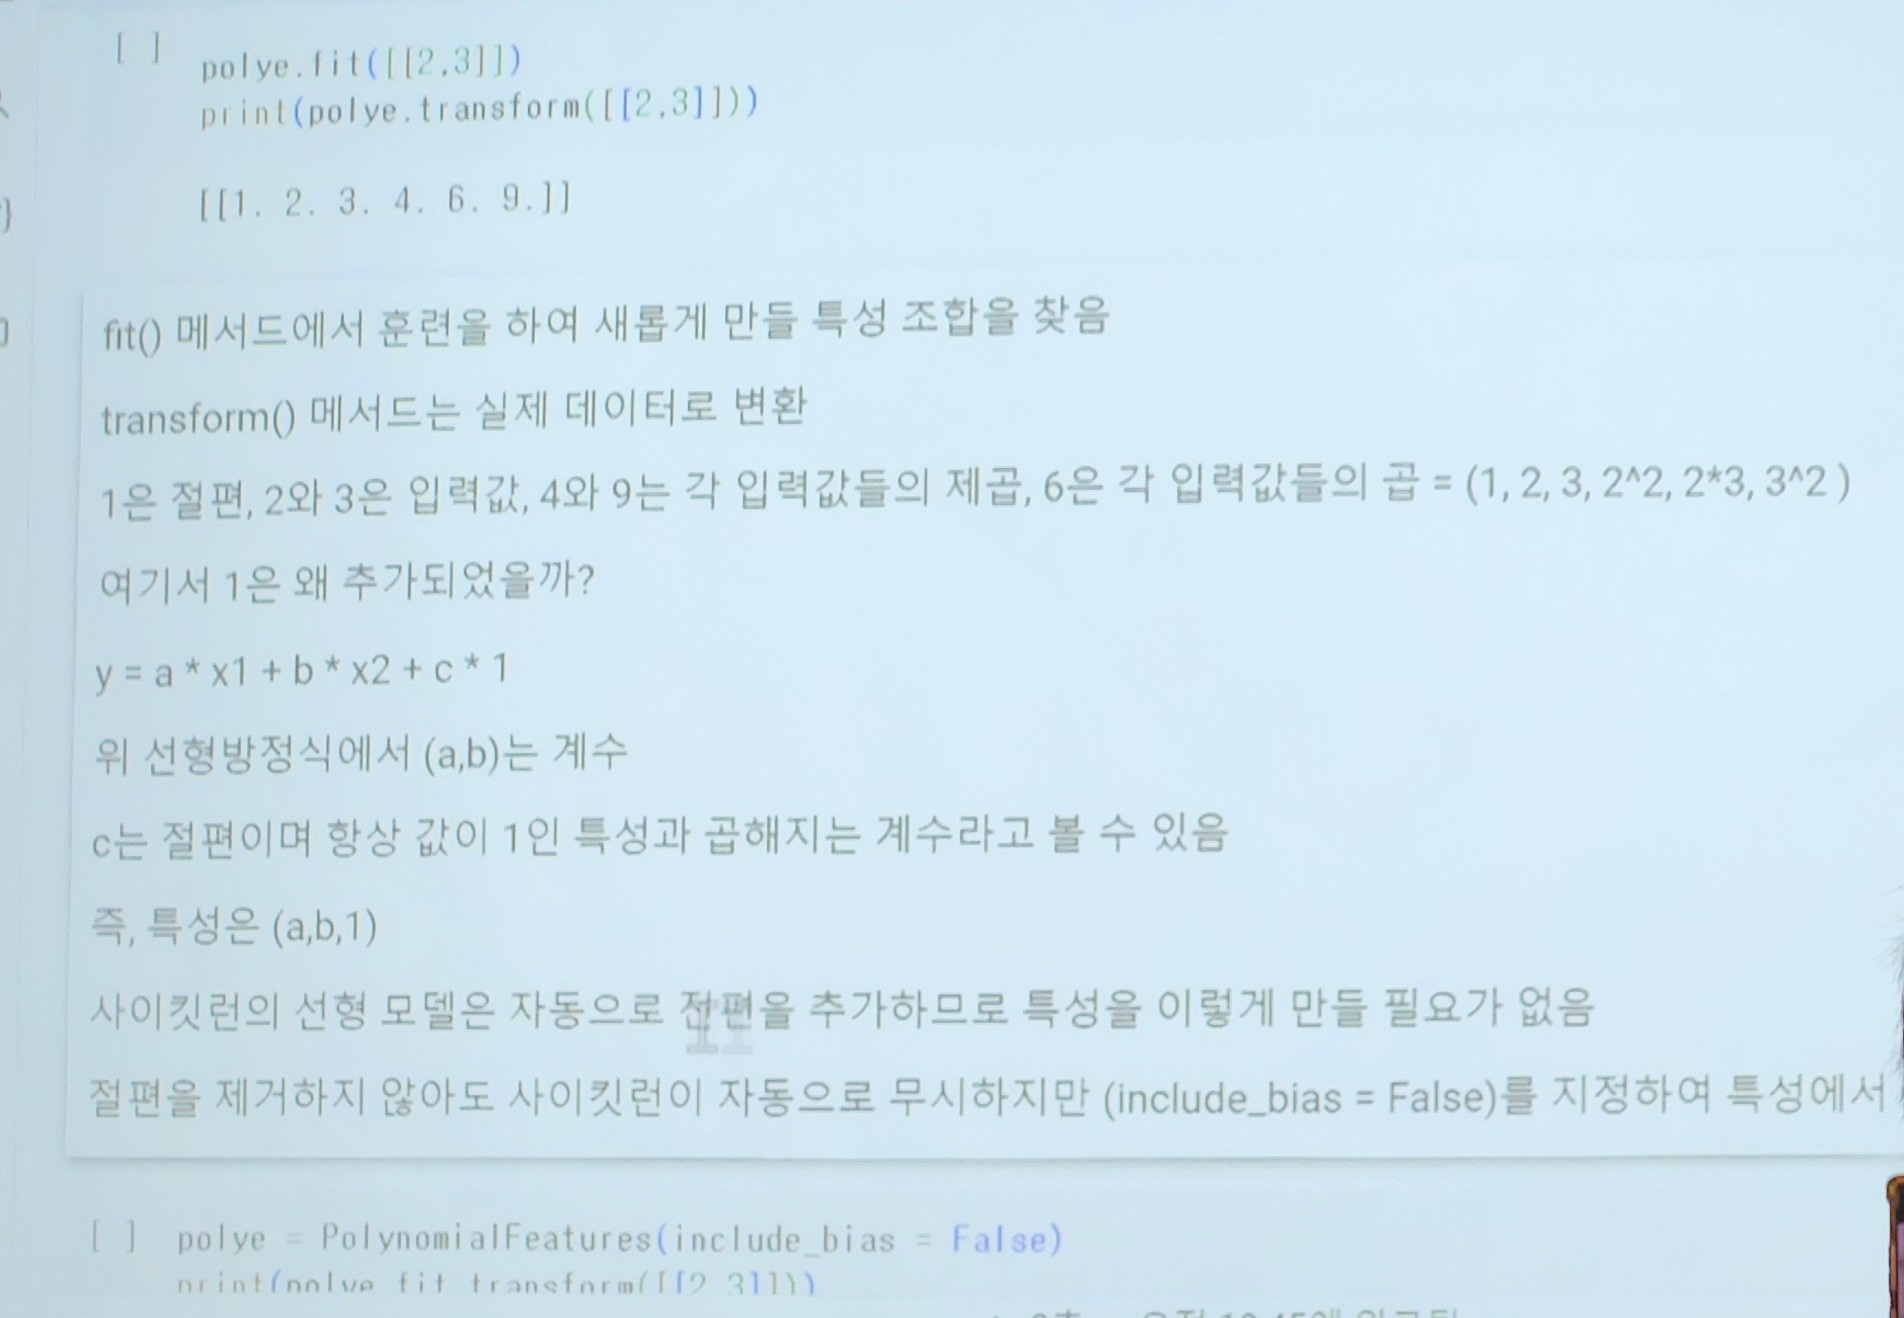

In [7]:
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


예제끝------------------------------------

In [10]:
poly = PolynomialFeatures(include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

print(train_input.shape)
print(train_poly.shape)
#3개에서 9개됨

(42, 3)
(42, 9)


In [11]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))
#과소적합 해결

0.9903183436982125
0.9714559911594111


In [14]:
#특성 늘림

poly = PolynomialFeatures(degree=5, include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

print(train_poly.shape)

lr.fit(train_poly, train_target)

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))
#-가 되네??? 과대적합

(42, 55)
0.9999999999996433
-144.40579436844948


##기울기와 절편은
1. 임이의 모델 파라미터(기울기, 절편 랜점) 선택
2. 경사하강법 사용  자세하게 알아야함
- 방법
1. 손실함수 or 비용항수 계산
2. 손실함수를 각 모델 파라미터 원소로 미분
3. 임이의 모델 파라미터에서 미분한 소닐함수에 0.01학습율을 곱한 값을 뺸값을 새로운 모델 파라미터로 설정
4. R^2가 최소가 될떄까지 방복

경사하강법


사진

경사하강법   
함수의 기울기를 구하고 경사가 가장 낮은 방향으로 계속 이동시겨 긊값에 이를떄까지 반복


미분 사용하지 않는 이유는 함수가 복잡하고 비선형적인 함수가 대부분

##과대적합 해결하기
- 규제
선형 회귀 모델은 특성에 곱해지는 계수(기울기) 작게 만듬

<br>

**규제전 정규화**  
mena std  
평균 표준편차  

이번에는 standardscalar

In [15]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

###규제 방법 2개
- 릿지  
 - 계수를 제곱한 값을 규제로 적용 **
 - 조금 더 선호 **
 - 확률적 평균 경사 하강법 사용 **
  - 훈련데이터의 일부 미니배치만 사용하여 모델 파라미터 업데이트
  - 배치는 모든데이터
  - 미니배치는 일정 크기로 분할된 데이터
  - 미니배치 경사하강법과는 다르게 미니배치에서 계산된 기울기를 모두 저장하고 업데이트를 조금씩 적용
  - 모든 미니배치에 계산된 기울기의 평균을 사용하여 업데이트
  - 즉 한 에포크마다 업데이트가 적요됨
- 주의: 확률적 경사 하강법과 다름
 - 미니배치가 하닌 하나의 훈련 데이터 사용
- 주의: 미니배치 경사 하강법과 다름
 <br>

 - 계수의 크기를 줄임

- 샘플 많을떄 졺음

- 랏소  
- 계수의 절댓값 기분으로 규제 적용
- 계수의 크기를 0으로 만들수 있음

In [16]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9896101671037343
0.9790693977615387


*규제 양 조절*  
alpha 매개변수로 규제 강도 조절
알파값이 크면 규제강도 세짐 -> 계수값을 더 줄이고 조금 더 과소적합 되도록 유도
알파값 작으면 규제 강도 약해짐 -> 계수값을 덜 줄이고 조금 더 과대적합 유도
알파값은 모델이 학습값이 아니라 사람이 사전 지정
-> 하이퍼 파라미터

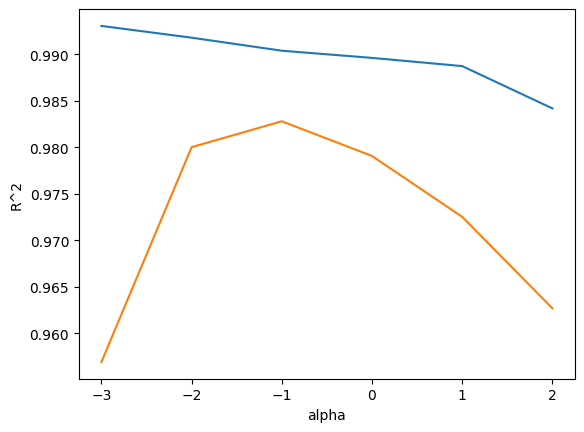

In [20]:
import matplotlib.pyplot as plt

train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
#10배차이라 로그스케일
for alpha in alpha_list:
    # 릿지 모델을 만듭니다
    ridge = Ridge(alpha=alpha)
    # 릿지 모델을 훈련합니다
    ridge.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

파란색(위) 과소적합으로 내려감  
두개가 가까울떄 좋음  
알파가 0.1

In [21]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465386928


In [23]:
#계수비교
print(lr.coef_)
print(ridge.coef_)

[-2.09046286e+04 -1.28182176e+03 -5.60568587e+03  2.08210606e+03
  1.22297051e+03 -1.43811540e+03 -4.56962070e+03 -5.32891399e+02
  6.00788378e+03 -2.10700052e+01 -6.86630545e+01 -1.38720413e+03
 -1.07566030e+03  3.95364102e+03  5.36644564e+03  3.82395517e+03
 -5.41578595e+03 -7.44650725e+03 -3.57626691e+03 -8.28151607e+00
  3.60946181e+02 -4.02975688e+02 -3.16263595e+03  3.78221470e+03
  1.35360877e+03  9.49694721e+03 -9.03127653e+03 -7.05277640e+03
 -5.77034174e+03 -9.30116998e+03  5.09465751e+03  9.77745663e+03
  9.37625135e+03  7.91894743e+03 -2.17004839e+00  3.18815197e+01
  1.05750599e+01  1.25145412e+02 -1.16343732e+03  8.34274225e+02
 -1.83477034e+03  7.09702960e+03 -1.74946596e+03 -3.82035083e+03
  5.50888378e+03 -1.57853612e+04 -1.46750807e+03  8.08789552e+03
  8.01725139e+03 -5.22510168e+03  1.18582793e+04  6.17623466e+03
 -7.04139964e+03 -6.28440329e+03 -7.60671211e+03]
[ 27.61933479  -1.64022156 -19.73256036  30.03061951  16.99800255
  17.83247301   4.46928273   3.87258547

*라쏘 모델*

0.989789897208096
0.9800593698421883


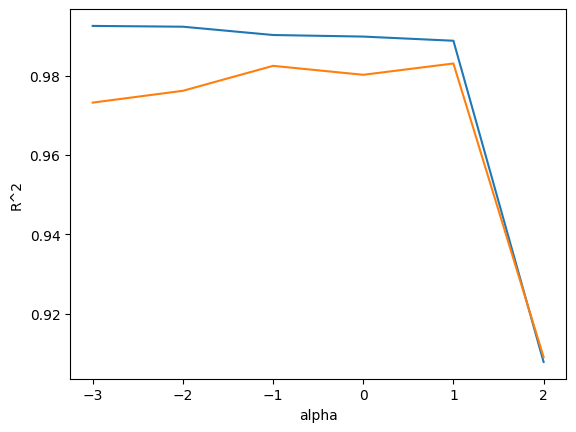

In [38]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

train_score = []
test_score = []


alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 라쏘 모델을 만듭니다
    lasso = Lasso(alpha=alpha, max_iter=10000)
    # 라쏘 모델을 훈련합니다
    lasso.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [37]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [39]:
print(np.sum(lasso.coef_ == 0))

52


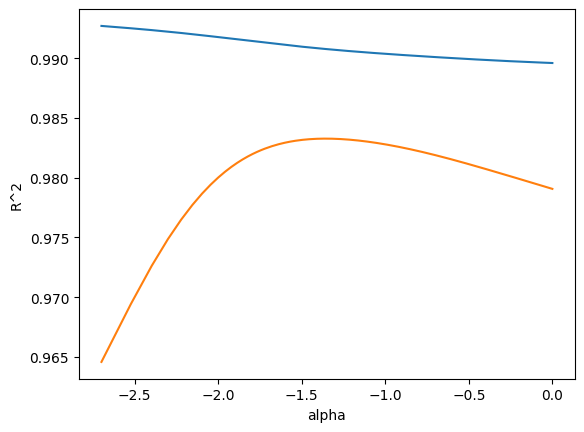

In [64]:
#릿지에서 최적의 알파값 찾기

train_score2 = []
test_score2 = []

newList = []
num = 0.001
while num < 1:
  num = num + 0.001
  newList.append(num)

alpha_list = newList
#10배차이라 로그스케일
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled, train_target)
    train_score2.append(ridge.score(train_scaled, train_target))
    test_score2.append(ridge.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score2)
plt.plot(np.log10(alpha_list), test_score2)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

-1.5